In [1]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### Import Data

In [3]:
credit_card_data = pd.read_csv('credit_card_clean.csv')

## 2. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [4]:
credit_card_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [5]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [6]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [7]:
credit_card_data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [8]:
credit_card_data.shape

(30000, 25)

In [10]:
credit_card_data['SEX'].unique()

array(['female', 'male'], dtype=object)

In [11]:
credit_card_data['EDUCATION'].unique()

array(['university', 'grad', 'highschool', 'other'], dtype=object)

In [12]:
credit_card_data['MARRIAGE'].unique()

array(['married', 'single', 'other'], dtype=object)

### Data Preparation

In [14]:
label_encode = LabelEncoder()

In [15]:
credit_card_data['SEX'] = label_encode.fit_transform(credit_card_data['SEX'])
credit_card_data['EDUCATION'] = label_encode.fit_transform(credit_card_data['EDUCATION'])
credit_card_data['MARRIAGE'] = label_encode.fit_transform(credit_card_data['MARRIAGE'])

In [19]:
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0,3,0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,3,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,3,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,3,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,3,0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
del credit_card_data['ID']

### Model Building

In [22]:
X = credit_card_data.drop('DEFAULT',axis=1)
y = credit_card_data['DEFAULT']

In [25]:
import matplotlib.pyplot as plt

In [26]:
y.value_counts()

DEFAULT
0    23364
1     6636
Name: count, dtype: int64

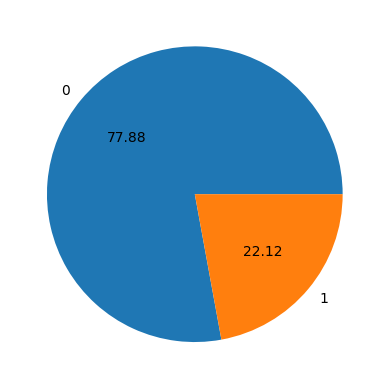

In [30]:
plt.pie(y.value_counts(),labels=[0,1],autopct='%.2f')
plt.show()

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=24,stratify=y)

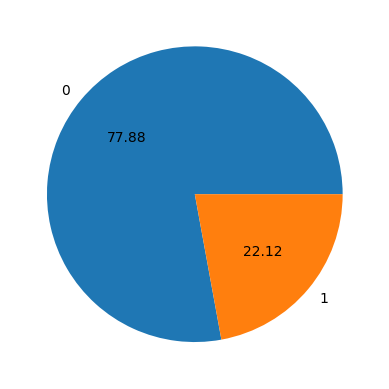

In [34]:
plt.pie(y_train.value_counts(),labels=[0,1],autopct='%.2f')
plt.show()

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [46]:
lgb_classifier = lightgbm.LGBMClassifier()

### Model Training

In [47]:
lgb_classifier.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639


d:\Data Science\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier()

In [49]:
y_pred_train = lgb_classifier.predict(X_train)
y_pred_test = lgb_classifier.predict(X_test)

In [50]:
accuracy_score(y_train,y_pred_train)

0.8427083333333333

In [51]:
accuracy_score(y_test,y_pred_test)

0.818

In [52]:
confusion_matrix(y_test,y_pred_test)

array([[4400,  273],
       [ 819,  508]])

### Comparing Execution time for different boosting algorithms

In [54]:
adb_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()
lgb_model = lightgbm.LGBMClassifier()

In [56]:
%%time
adb_model.fit(X_train,y_train)


CPU times: total: 1.66 s
Wall time: 1.66 s


AdaBoostClassifier()

In [64]:
%%time
gb_model.fit(X_train,y_train)


CPU times: total: 8.12 s
Wall time: 8.37 s


GradientBoostingClassifier()

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
xgb_model.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
%%time
lgb_classifier.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
CPU times: total: 656 ms
Wall time: 185 ms


LGBMClassifier()

### Model Evaluation

In [73]:
y_pred_adb = adb_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_classifier.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred_adb)

0.8178333333333333

In [75]:
accuracy_score(y_test,y_pred_gb)

0.818

In [76]:
accuracy_score(y_test,y_pred_xgb)

0.811

In [77]:
accuracy_score(y_test,y_pred_lgb)

0.818

In [83]:
feature_importance = pd.DataFrame({'Features':X_train.columns,'XGB Features':xgb_model.feature_importances_,
              'LGB Features':lgb_classifier.feature_importances_,'ADB Features':adb_model.feature_importances_,
              'GB Features':gb_model.feature_importances_})

In [87]:
feature_importance.sort_values(by='GB Features',ascending=False)

,Features,XGB Features,LGB Features,ADB Features,GB Features
5,PAY_1,0.364276,90,0.498802,0.620851
6,PAY_2,0.094650,47,0.005289,0.065141
7,PAY_3,0.041059,56,0.051113,0.046034
11,BILL_AMT1,0.024337,253,0.046958,0.034582
19,PAY_AMT3,0.025727,202,0.037130,0.029587
0,LIMIT_BAL,0.024672,230,0.042592,0.024303
10,PAY_6,0.036544,62,0.040540,0.023844
9,PAY_5,0.045570,40,0.021892,0.021940
17,PAY_AMT1,0.020616,177,0.090160,0.017228
18,PAY_AMT2,0.027196,184,0.047748,0.017054
